In [187]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

def tem_oculos(file: str):
    try:
        final = file+'.png'
        img = cv.imread(final)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    except cv.error:
        final = file+'.jpg'
        img = cv.imread(final)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), )
        
    face_classifier = cv.CascadeClassifier(
        cv.data.haarcascades + "haarcascade_frontalface_default.xml"
    )
    face = face_classifier.detectMultiScale(
        img, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
    )

    cropped_img = img[face[0][1] : face[0][1] + face[0][3], face[0][0] : face[0][0] + face[0][2]]


    # x = face[0][0] = ponto x do canto superior esquerdo
    # y = face[0][1] = ponto y do canto superior esquerdo
    # w = face[0][2] = largura da face
    # h = face[0][3] = altura da face

    for (x, y, w, h) in face:
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.figure(figsize=(20,10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))

    parte_cima = img[int(face[0][1]*1.5) : face[0][1] + int(face[0][3]/1.75),face[0][0] : face[0][0] + face[0][2]]

    plt.imshow(cv.cvtColor(parte_cima, cv.COLOR_BGR2RGB))

    gray_crop = cv.cvtColor(parte_cima, cv.COLOR_BGR2GRAY)
    plt.imshow(gray_crop, cmap='gray')
    plt.show()

    blur = cv.blur(gray_crop,(3,3))
    blur = cv.blur(blur,(3,3))

    plt.imshow(blur, cmap='gray')
    plt.show()

    #OPERADOR DE SOBEL
    kernel = np.array([
        [2,0,-2],
        [4,0,-4],
        [2,0,-2]
    ])/9


    # Aplica kernel a imagem usando Filtro Correlação
    # src: imagem a ser manipulada
    # ddepth: profundidade desejável da imagem de destino. O valor -1 representa que a imagem resultante terá a mesma profundidade da imagem de origem.
    # kernel: matrix de kernel
    vert = cv.filter2D(blur, -1, kernel)
    horiz = cv.filter2D(blur, -1, kernel.T)
    all_borders = vert + horiz

    plt.show()
    plt.imshow(all_borders, cmap='gray')
    plt.show()
    _,binary = cv.threshold(all_borders, 30, 255, cv.THRESH_BINARY)

    plt.imshow(binary, cmap='gray')
    plt.show()
    #pesquisar o entre a metade da imagem na horizontal e metade de baixo da vertical

    range_x_initial_nariz = int(len(binary.T)*0.45)
    range_x_final_nariz = int(len(binary.T)*0.55)
    range_y_nariz = int(len(binary)/3)
    final_nariz = binary[range_y_nariz:,range_x_initial_nariz:range_x_final_nariz]
    plt.imshow(final_nariz, cmap='gray')
    plt.show()

    range_x_initial_olho_l = int(len(binary.T)*0.25)
    range_x_final_olho_l = int(len(binary.T)*0.4)
    range_y_olho_l = int(len(binary)/1.5)
    final_olho_l = binary[range_y_olho_l:,range_x_initial_olho_l:range_x_final_olho_l]
    plt.imshow(final_olho_l, cmap='gray')
    plt.show()

    range_x_initial_olho_r = int(len(binary.T)*0.6)
    range_x_final_olho_r = int(len(binary.T)*0.75)
    range_y_olho_r = int(len(binary)/1.5)
    final_olho_r = binary[range_y_olho_r:,range_x_initial_olho_r:range_x_final_olho_r]
    plt.imshow(final_olho_r, cmap='gray')
    plt.show()

    cv.rectangle(blur, (range_x_initial_nariz, range_y_nariz), (range_x_final_nariz, len(binary)), (255, 0, 0), 4)
    cv.rectangle(blur, (range_x_initial_olho_l, range_y_olho_l), (range_x_final_olho_l, len(binary)), (255, 0, 0), 4)
    cv.rectangle(blur, (range_x_initial_olho_r, range_y_olho_r), (range_x_final_olho_r, len(binary)), (255, 0, 0), 4)


    plt.imshow(blur, cmap='gray')
    plt.show()

    areas_interesse = [final_nariz, final_olho_l, final_olho_r]
    oc = 0

    for area in areas_interesse:
        if 255 in area:
            oc += 1

    if oc > 1:
        print('óculos')
    else:
        print('sem óculos')

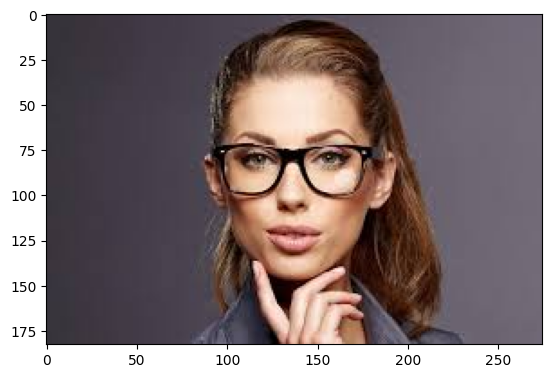

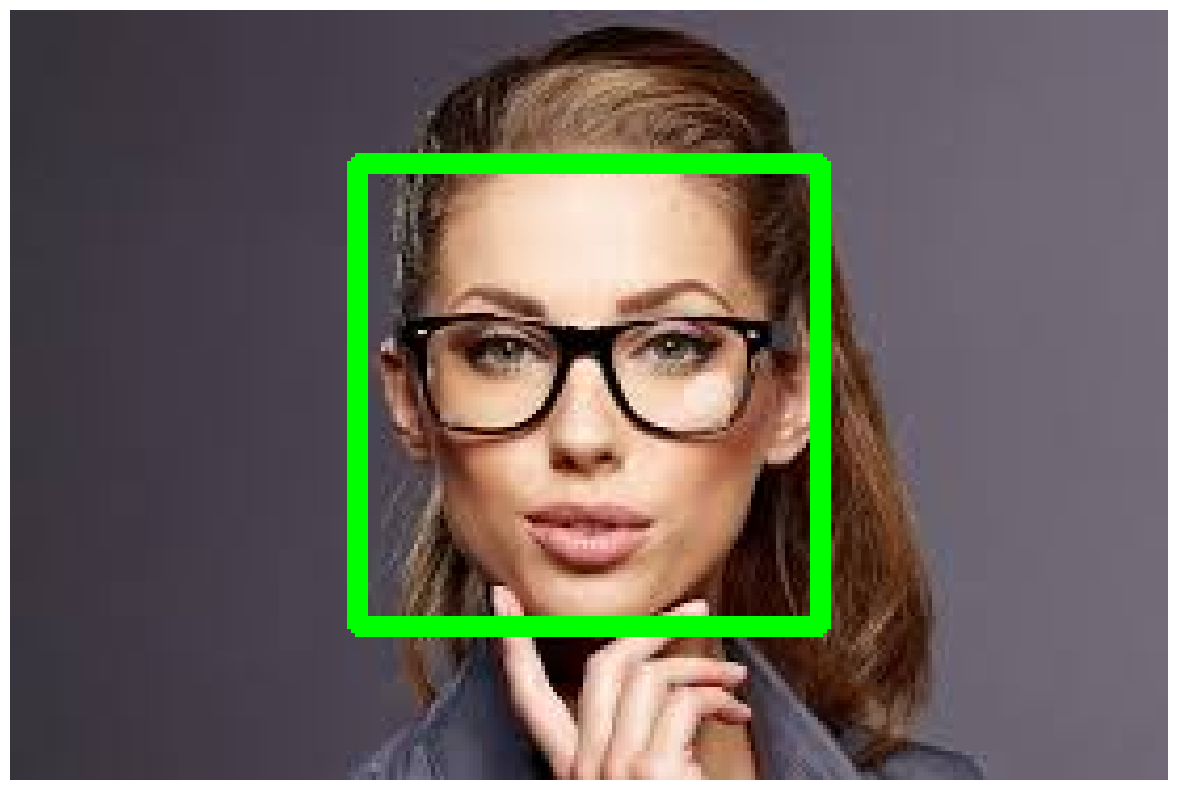

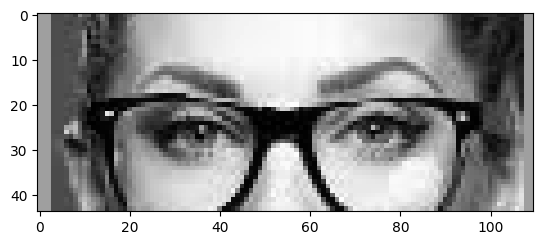

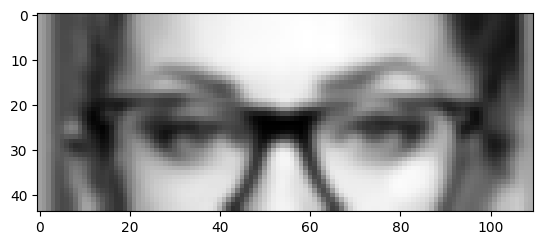

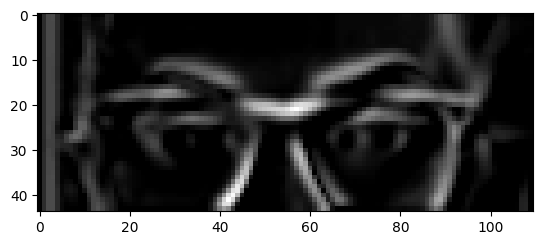

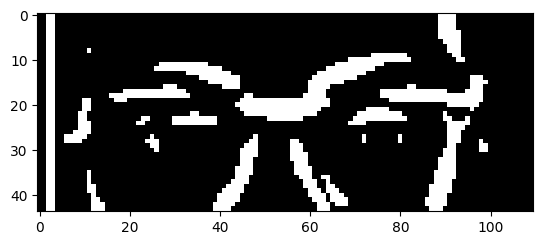

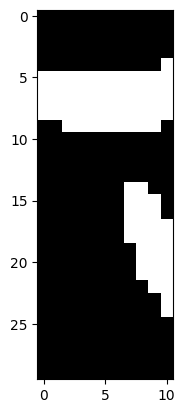

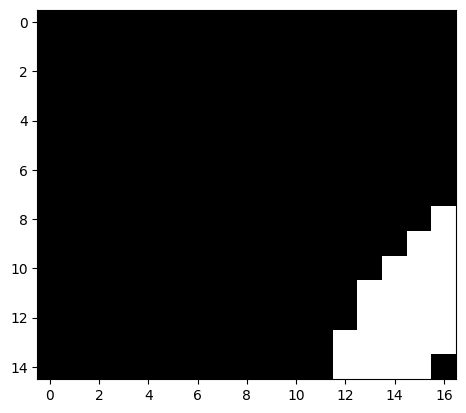

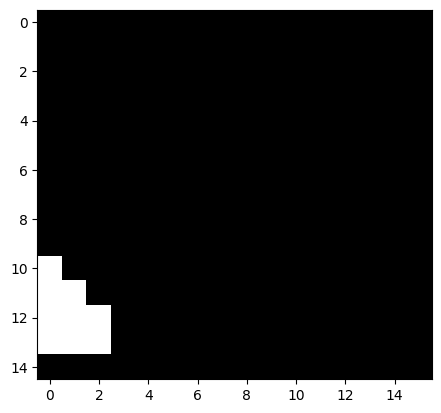

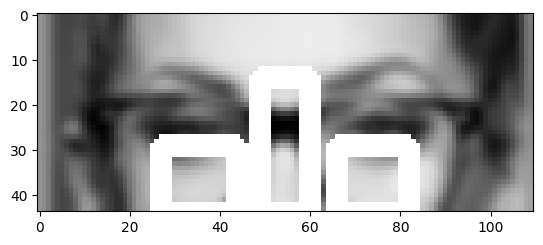

óculos


In [192]:
tem_oculos('img/oculos0')

[ WARN:0@2473.175] global loadsave.cpp:248 findDecoder imread_('img/harry_oc.png'): can't open/read file: check file path/integrity


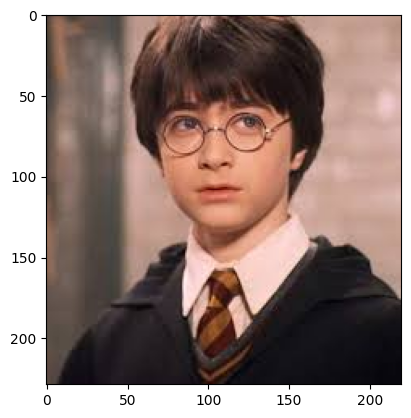

In [182]:
file = 'img/harry_oc'
try:
    final = file+'.png'
    img = cv.imread(final)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
except cv.error:
    final = file+'.jpg'
    img = cv.imread(final)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


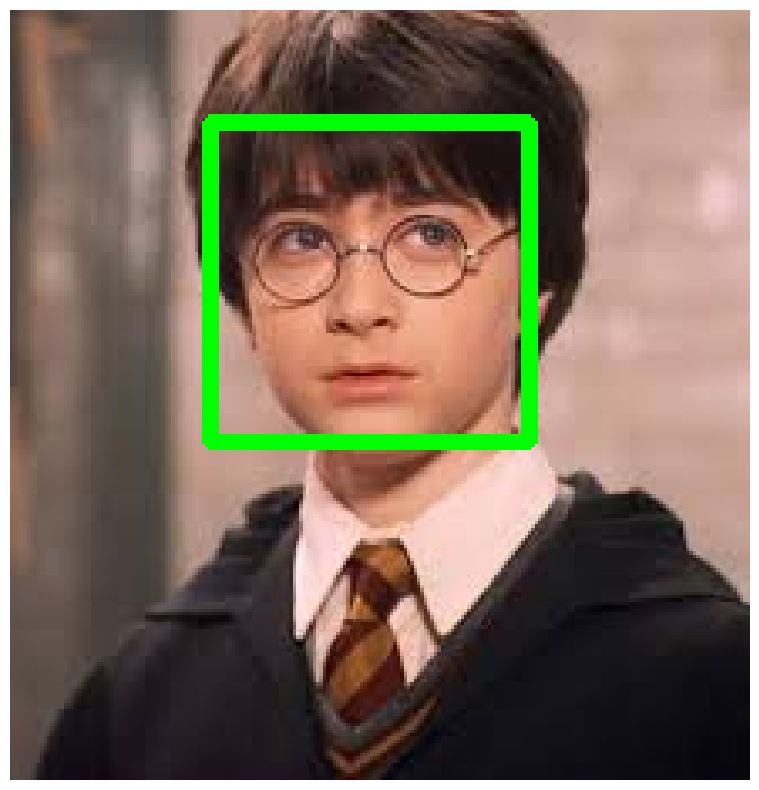

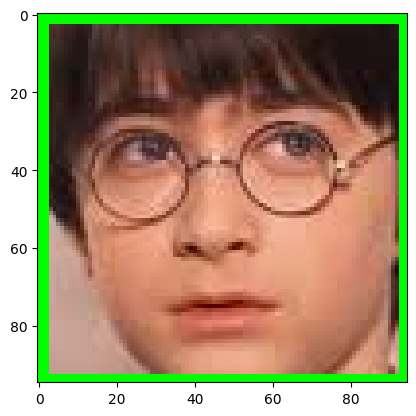

In [183]:
face_classifier = cv.CascadeClassifier(
    cv.data.haarcascades + "haarcascade_frontalface_default.xml"
)
face = face_classifier.detectMultiScale(
    img, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

cropped_img = img[face[0][1] : face[0][1] + face[0][3], face[0][0] : face[0][0] + face[0][2]]


# x = face[0][0] = ponto x do canto superior esquerdo
# y = face[0][1] = ponto y do canto superior esquerdo
# w = face[0][2] = largura da face
# h = face[0][3] = altura da face

for (x, y, w, h) in face:
    cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))


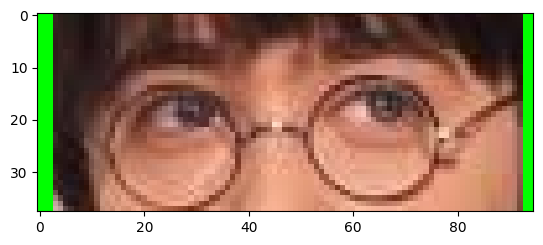

In [184]:
parte_cima = img[int(face[0][1]*1.5) : face[0][1] + int(face[0][3]/1.75),face[0][0] : face[0][0] + face[0][2]]

plt.imshow(cv.cvtColor(parte_cima, cv.COLOR_BGR2RGB))


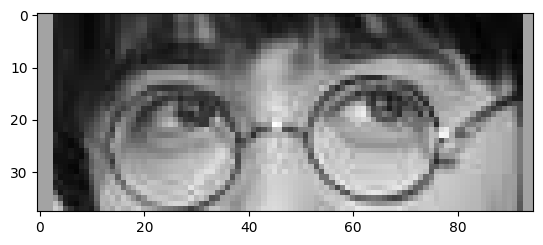

In [185]:

gray_crop = cv.cvtColor(parte_cima, cv.COLOR_BGR2GRAY)
plt.imshow(gray_crop, cmap='gray')
plt.show()


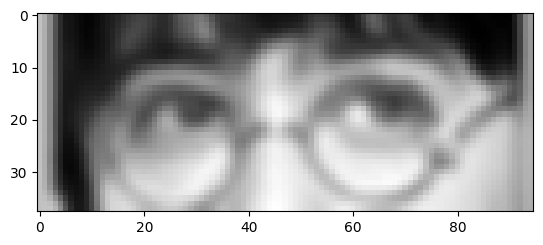

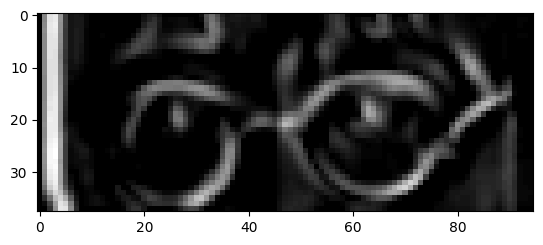

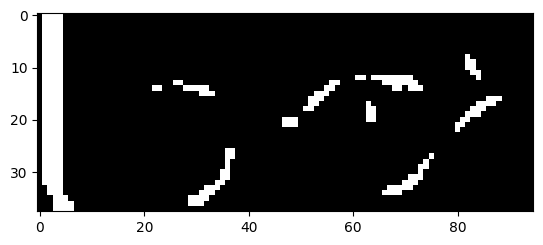

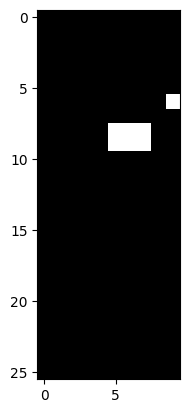

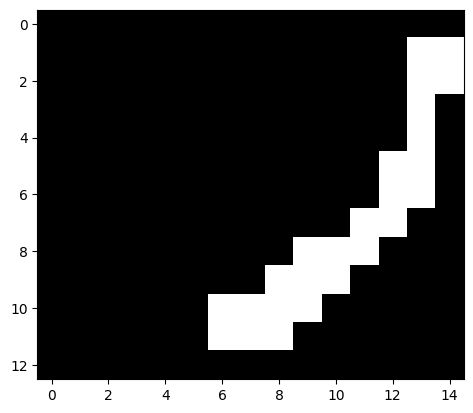

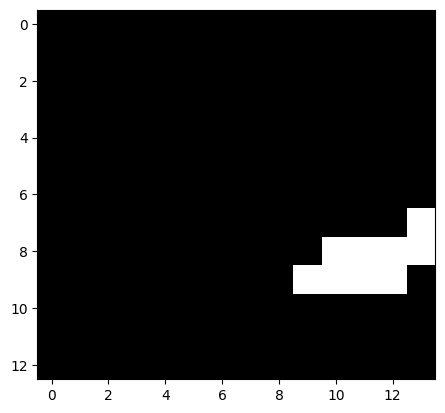

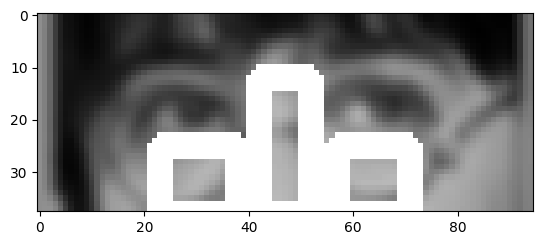

óculos


In [186]:
blur = cv.blur(gray_crop,(3,3))
blur = cv.blur(blur,(3,3))

plt.imshow(blur, cmap='gray')
plt.show()

#OPERADOR DE SOBEL
kernel = np.array([
    [2,0,-2],
    [4,0,-4],
    [2,0,-2]
])/9


# Aplica kernel a imagem usando Filtro Correlação
# src: imagem a ser manipulada
# ddepth: profundidade desejável da imagem de destino. O valor -1 representa que a imagem resultante terá a mesma profundidade da imagem de origem.
# kernel: matrix de kernel
vert = cv.filter2D(blur, -1, kernel)
horiz = cv.filter2D(blur, -1, kernel.T)
all_borders = vert + horiz

plt.show()
plt.imshow(all_borders, cmap='gray')
plt.show()
_,binary = cv.threshold(all_borders, 30, 255, cv.THRESH_BINARY)

plt.imshow(binary, cmap='gray')
plt.show()
#pesquisar o entre a metade da imagem na horizontal e metade de baixo da vertical

range_x_initial_nariz = int(len(binary.T)*0.45)
range_x_final_nariz = int(len(binary.T)*0.55)
range_y_nariz = int(len(binary)/3)
final_nariz = binary[range_y_nariz:,range_x_initial_nariz:range_x_final_nariz]
plt.imshow(final_nariz, cmap='gray')
plt.show()

range_x_initial_olho_l = int(len(binary.T)*0.25)
range_x_final_olho_l = int(len(binary.T)*0.4)
range_y_olho_l = int(len(binary)/1.5)
final_olho_l = binary[range_y_olho_l:,range_x_initial_olho_l:range_x_final_olho_l]
plt.imshow(final_olho_l, cmap='gray')
plt.show()

range_x_initial_olho_r = int(len(binary.T)*0.6)
range_x_final_olho_r = int(len(binary.T)*0.75)
range_y_olho_r = int(len(binary)/1.5)
final_olho_r = binary[range_y_olho_r:,range_x_initial_olho_r:range_x_final_olho_r]
plt.imshow(final_olho_r, cmap='gray')
plt.show()

cv.rectangle(blur, (range_x_initial_nariz, range_y_nariz), (range_x_final_nariz, len(binary)), (255, 0, 0), 4)
cv.rectangle(blur, (range_x_initial_olho_l, range_y_olho_l), (range_x_final_olho_l, len(binary)), (255, 0, 0), 4)
cv.rectangle(blur, (range_x_initial_olho_r, range_y_olho_r), (range_x_final_olho_r, len(binary)), (255, 0, 0), 4)


plt.imshow(blur, cmap='gray')
plt.show()

areas_interesse = [final_nariz, final_olho_l, final_olho_r]
oc = 0

for area in areas_interesse:
    if 255 in area:
        oc += 1

if oc > 1:
    print('óculos')
else:
    print('sem óculos')